# Imports

In [1]:
from function_for_SDE_correction import *

In [2]:
# Loading the ensembles and actuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]

# load the corrected ensembles
Corrected_ensembles_DK1_OffshoreWindPower_lstm = pd.read_csv("results/DK1_OffshoreWindPower_lstm_corrected_ensembles_2024-06-25.csv")
Corrected_ensembles_DK1_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm = pd.read_csv("results/DK1_OnshoreWindPower_lstm_corrected_ensembles_2024-06-25.csv")
Corrected_ensembles_DK1_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_lstm.index)


Corrected_ensembles_DK2_OffshoreWindPower_lstm = pd.read_csv("results/DK2_OffshoreWindPower_lstm_corrected_ensembles_2024-06-25.csv")
Corrected_ensembles_DK2_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_lstm = pd.read_csv("results/DK2_OnshoreWindPower_lstm_corrected_ensembles_2024-06-25.csv")
Corrected_ensembles_DK2_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)


Corrected_ensembles_DK1_OffshoreWindPower_FFNN = pd.read_csv("results/DK1_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_csv("results/DK1_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_csv("results/DK2_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN = pd.read_csv("results/DK2_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.set_index("HourDK", inplace=True)

Corrected_ensembles_DK1_SolarPower_FFNN = pd.read_csv("results/DK1_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK1_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK1_SolarPower_FFNN.index)
Corrected_ensembles_DK1_SolarPower_FFNN.set_index(Corrected_ensembles_DK1_SolarPower_FFNN.index, inplace=True)
Corrected_ensembles_DK2_SolarPower_FFNN = pd.read_csv("results/DK2_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK2_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK2_SolarPower_FFNN.index)
Corrected_ensembles_DK2_SolarPower_FFNN.set_index(Corrected_ensembles_DK2_SolarPower_FFNN.index, inplace=True)


Corrected_ensembles_DK1_SolarPower_lstm = pd.read_csv("results/DK1_SolarPower_lstm_corrected_ensembles_2024-06-24.csv", index_col=0)
Corrected_ensembles_DK1_SolarPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_SolarPower_lstm.index)
Corrected_ensembles_DK1_SolarPower_lstm.set_index(Corrected_ensembles_DK1_SolarPower_lstm.index, inplace=True)
Corrected_ensembles_DK2_SolarPower_lstm = pd.read_csv("results/DK2_SolarPower_lstm_corrected_ensembles_2024-06-25.csv", index_col=0)
Corrected_ensembles_DK2_SolarPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK2_SolarPower_lstm.index)
Corrected_ensembles_DK2_SolarPower_lstm.set_index(Corrected_ensembles_DK2_SolarPower_lstm.index, inplace=True)



In [3]:
from functions_for_TAQR import one_step_quantile_prediction

# Using TAQR

In [4]:
ensembles = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
quantiles = [0.1, 0.5, 0.9]

def run_one_step_quantile_prediction(ensembles, actuals, quantiles):
    y_preds = {}
    y_actuals = {}
    for q in quantiles:
        y_pred, y_actual, BETA = one_step_quantile_prediction(ensembles.values, actuals.values, 200, len(actuals), q, False)
        y_preds[q] = y_pred
        y_actuals[q] = y_actual
    return y_preds, y_actuals


def SDE_subprocess_skill_score(corrected_ensembles, actuals, quantiles, n_steps=100, number_of_repeats=100, print_=False, plot_=False, plotname="TestPlot", latex_=False, plot_pacf_acf=False):
    
    '''
    This is the much more final version that can output acf and pacf plots, alongside plots and latex tables. Calculates the Skill score for CRPS and QSS as well as the Variogram score.
    
    '''
    
    # assuming here that ensembles are and actuals are the test set from 75-100% of the data
    # import pandas as pd
    # import matplotlib.pyplot as plt
    from statsmodels.graphics.tsaplots import plot_pacf
    n_steps = int(len(actuals)*(15/25)) # 10 out of 25% , " which is the train set for the SDE"
    dt = 1
    residuals_dict = {}
    estimated_params_dict = {}
    percentile_value_dict = {}
    simulated_data_dict = {}
    for q in quantiles:
        percentile_value = corrected_ensembles.quantile(q, axis=1)
        percentile_value_dict[q] = percentile_value
        residuals = actuals.loc[percentile_value.index] - percentile_value.values
        residuals_dict[q] = residuals
        estimated_params_dict[q] = estimate_ou_parameters(residuals[:n_steps], dt)
        lam, sigma = estimated_params_dict[q]
        sigma = np.sqrt(sigma)

        simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])

    median = percentile_value_dict[quantiles[0]][n_steps:]
    sde_corrected_ensembles = pd.DataFrame()
    variogram_score_sde_corrected_list = []
    crps_sde_corrected_list = []
    qss_sde_corrected_list = []

    for i in range(number_of_repeats):
        for q in quantiles:
            residuals = residuals_dict[q]
            lam, sigma = estimated_params_dict[q]
            sigma = np.sqrt(sigma)
            simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])
            sde_corrected_ensembles[str(q)] = percentile_value_dict[q].values[n_steps:] + simulated_data_dict[q] # (residuals_dict[q][n_steps:] + simulated_data_dict[q])
        
        variogram_score_sde_corrected_list.append(variogram_score_R(sde_corrected_ensembles.values, actuals.loc[median.index].values, p=0.5))
        crps_sde_corrected_list.append(calculate_crps(actuals.loc[median.index].values, sde_corrected_ensembles.values))
        qss_sde_corrected_list.append(calculate_qss(actuals.loc[median.index].values, sde_corrected_ensembles.values, quantiles=quantiles))
    
    variogram_score = variogram_score_R(corrected_ensembles.loc[median.index].quantile(quantiles, axis=1).T.values, actuals.loc[median.index].values, p=0.5)
    crps_score = calculate_crps(actuals.loc[median.index].values, corrected_ensembles.loc[median.index].quantile(quantiles, axis=1).T.values)
    qss_score = calculate_qss(actuals.loc[median.index].values, corrected_ensembles.loc[median.index].quantile(quantiles, axis=1).T.values, quantiles=quantiles)

    variogram_score_sde_corrected_mean = np.mean(np.array(variogram_score_sde_corrected_list))
    crps_sde_corrected_mean = np.mean(np.array(crps_sde_corrected_list))
    qss_sde_corrected_mean = np.mean(np.array(qss_sde_corrected_list))

    variogram_score_prev = float(variogram_score)
    crps_score_prev = float(crps_score)
    qss_score_prev = float(np.mean(np.array(qss_score)))


    # plot the acf of the residuals
    # for q in quantiles:
    if plot_pacf_acf:

        residuals = residuals_dict[0.5]
        percentile_value = sde_corrected_ensembles.quantile(0.5, axis=1)
        residuals_sde = actuals.loc[percentile_value.index] - percentile_value.values

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot autocorrelation of actuals
        pd.plotting.autocorrelation_plot(actuals.loc[percentile_value.index], ax=ax1, color="black", linewidth=2).set_xlim([0, 100])
        line3, = ax1.plot([], [], color="black", label='Actuals', linewidth=2)

        pd.plotting.autocorrelation_plot(corrected_ensembles.quantile(0.5, axis=1).T.values, ax=ax1, color="orange", linestyle="--", linewidth=2).set_xlim([0, 100])
        line4, = ax1.plot([], [], color="orange", label='Corrected Ensembles', linewidth=1.5, linestyle="--")

        pd.plotting.autocorrelation_plot(sde_corrected_ensembles.loc[percentile_value.index].quantile(0.5, axis=1), ax=ax1, color="green", linestyle="--", linewidth=2).set_xlim([0, 100])
        line5, = ax1.plot([], [], color="green", label='SDE Corrected Ensembles', linewidth=1.5, linestyle="--")

        ax1.set_title('Autocorrelation Plots')
        ax1.legend()

        # Plot partial autocorrelation of actuals
        plot_pacf(actuals.loc[percentile_value.index], ax=ax2, color="black", linewidth=2, lags=10)
        line3_pacf, = ax2.plot([], [], color="black", label='Actuals', linewidth=2)

        plot_pacf(corrected_ensembles.quantile(0.5, axis=1).T.values, ax=ax2, color="orange", linestyle="--", linewidth=2, lags=10)
        line4_pacf, = ax2.plot([], [], color="orange", label='Corrected Ensembles', linewidth=1.5, linestyle="--")

        plot_pacf(sde_corrected_ensembles.loc[percentile_value.index].quantile(0.5, axis=1), ax=ax2, color="green", linestyle="--", linewidth=2, lags=10)
        line5_pacf, = ax2.plot([], [], color="green", label='SDE Corrected Ensembles', linewidth=1.5, linestyle="--")

        ax2.set_title('Partial Autocorrelation Plots')
        ax2.legend()

        # Save the figure
        plt.tight_layout()
        plt.savefig(f"figures/ACF_PACF_25062024_combined_{plotname}.pdf")
        plt.show()

    # print(qss_score_prev, "qss_score_prev")

    variogram_skill_score_list =  (np.array(variogram_score_sde_corrected_list) / variogram_score_prev)
    crps_skill_score_list =  (np.array(crps_sde_corrected_list) / crps_score_prev)
    qss_skill_score_list =  ((np.array(qss_sde_corrected_list)) / qss_score_prev)

    variogram_skill_score_mean =  (variogram_score_sde_corrected_mean / variogram_score_prev)
    crps_skill_score_mean =  (crps_sde_corrected_mean / crps_score_prev)
    qss_skill_score_mean =  (qss_sde_corrected_mean / qss_score_prev)

    if print_:
        print("Skill Scores comparison:")
        print(f"  Variogram Skill Score: {variogram_skill_score_mean:.4f}")
        print(f"  CRPS Skill Score: {crps_skill_score_mean:.4f}")
        print(f"  QSS Skill Score: {qss_skill_score_mean:.4f}")

    if latex_:
        latex_table = f"""
        \\begin{{table}}[h!]
            \\centering
            \\begin{{tabular}}{{|c|c|}}
                \\hline
                & \\textbf{{Skill Score}}  \\\\
                \\hline
                \\textbf{{Variogram Skill Score}} & {variogram_skill_score_mean:.4f}  \\\\
                \\hline
                \\textbf{{CRPS Skill Score}} & {crps_skill_score_mean:.4f}  \\\\
                \\hline
                \\textbf{{QSS Skill Score}} & {qss_skill_score_mean:.4f} \\\\
                \\hline
            \\end{{tabular}}
            \\caption{{Comparison of skill scores for SDE corrected and previous ensembles {plotname}}}
            \\label{{table:skill_scores_comparison}}
        \\end{{table}}
        """

        # Save to .tex file
        with open(f"latex_output/3skill_scores_SDE_comparison_v2_{plotname}.tex", "w") as file:
            file.write(latex_table)

    if number_of_repeats > 10 and plot_:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Subplot 1: Variogram Skill Scores
        sns.histplot(data=pd.DataFrame(variogram_skill_score_list), kde=True, label="SDE corr. Variogram Skill Scores", bins=30, ax=axes[0])
        axes[0].axvline(variogram_skill_score_mean, color="black", label="SDE corr. Mean Variogram Skill Score")
        axes[0].axvline(1, color="red", label="Skill Score Baseline (1)")
        axes[0].set_xlabel("Variogram Skill Score")
        axes[0].set_ylabel("Frequency")
        axes[0].set_title("Variogram Skill Score for SDE corrected ensembles")
        axes[0].legend()

        # Subplot 2: QSS Skill Scores
        sns.histplot(data=pd.DataFrame(np.mean(np.array(qss_skill_score_list), axis = 1) ), kde=True, label="SDE corr. QSS Skill Scores", bins=20, ax=axes[1])
        axes[1].axvline(qss_skill_score_mean, color="black", label="SDE corr. Mean QSS Skill Score")
        axes[1].axvline(1, label="Skill Score Baseline (1)", color="red")
        axes[1].set_xlabel("QSS Skill Score")
        axes[1].set_ylabel("Frequency")
        axes[1].set_title("QSS Skill Score for SDE corrected ensembles")
        axes[1].legend()

        # Subplot 3: CRPS Skill Scores
        sns.histplot(data=pd.DataFrame(crps_skill_score_list), kde=True, label="SDE corr. CRPS Skill Scores", bins=30, ax=axes[2])
        axes[2].axvline(crps_skill_score_mean, color="black", label="SDE corr. Mean CRPS Skill Score")
        axes[2].axvline(1, label="Skill Score Baseline (1)", color="red")
        axes[2].set_xlabel("CRPS Skill Score")
        axes[2].set_ylabel("Frequency")
        axes[2].set_title("CRPS Skill Score for SDE corrected ensembles")
        axes[2].legend()

        plt.tight_layout()
        plt.savefig(f"figures/{plotname}_v2.pdf")
        plt.show()

    return variogram_skill_score_list, crps_skill_score_list, qss_skill_score_list, sde_corrected_ensembles


In [5]:

def SDE_subprocess_ensembles_only(corrected_ensembles, actuals, quantiles, perc_train_sde = 15, number_of_repeats=100):

    n_steps = int(len(actuals)*(perc_train_sde/25)) # 10 out of 25% , " which is the train set for the SDE"
    dt = 1
    residuals_dict = {}
    estimated_params_dict = {}
    percentile_value_dict = {}
    simulated_data_dict = {}
    ALL_SDE_ENSEMBLES = {}
    for q in quantiles:
        percentile_value = corrected_ensembles.quantile(q, axis=1)
        percentile_value_dict[q] = percentile_value
        residuals = actuals.loc[percentile_value.index] - percentile_value.values
        residuals_dict[q] = residuals
        estimated_params_dict[q] = estimate_ou_parameters_multitry(residuals[:n_steps], dt)
        lam, sigma = estimated_params_dict[q]
        sigma = np.sqrt(sigma)

        print(len(residuals[n_steps:]))
        simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])

    print("The estimated parameters are: ", estimated_params_dict)
    median = percentile_value_dict[quantiles[0]][n_steps:]
    sde_corrected_ensembles = pd.DataFrame()
    variogram_score_sde_corrected_list = []
    crps_sde_corrected_list = []
    qss_sde_corrected_list = []

    for i in range(number_of_repeats):
        for q in quantiles:
            residuals = residuals_dict[q]
            lam, sigma = estimated_params_dict[q]
            sigma = np.sqrt(sigma)
            simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])
            sde_corrected_ensembles[str(q)] = percentile_value_dict[q].values[n_steps:] + simulated_data_dict[q] # (residuals_dict[q][n_steps:] + simulated_data_dict[q])
        
        ALL_SDE_ENSEMBLES[i] = sde_corrected_ensembles

    



    return sde_corrected_ensembles, ALL_SDE_ENSEMBLES


def SDE_subprocess_parameters_only(corrected_ensembles, actuals, quantiles, perc_train_sde = 15, number_of_repeats=100):

    n_steps = int(len(actuals)*(perc_train_sde/25)) # 10 out of 25% , " which is the train set for the SDE"
    dt = 1
    residuals_dict = {}
    estimated_params_dict = {}
    percentile_value_dict = {}
    simulated_data_dict = {}
    ALL_SDE_ENSEMBLES = {}
    for q in quantiles:
        percentile_value = corrected_ensembles.quantile(q, axis=1)
        percentile_value_dict[q] = percentile_value
        residuals = actuals.loc[percentile_value.index] - percentile_value.values
        residuals_dict[q] = residuals
        estimated_params_dict[q] = estimate_ou_parameters_multitry(residuals[:n_steps], dt)
        lam, sigma = estimated_params_dict[q]
        sigma = np.sqrt(sigma)

        print(len(residuals[n_steps:]))
        simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])

    print("The estimated parameters are: ", estimated_params_dict)
    median = percentile_value_dict[quantiles[0]][n_steps:]
    sde_corrected_ensembles = pd.DataFrame()
    variogram_score_sde_corrected_list = []
    crps_sde_corrected_list = []
    qss_sde_corrected_list = []

    for i in range(number_of_repeats):
        for q in quantiles:
            residuals = residuals_dict[q]
            lam, sigma = estimated_params_dict[q]
            sigma = np.sqrt(sigma)
            simulated_data_dict[q] = simulate_ou_process(lam, sigma, dt, n_steps=len(actuals)-n_steps, initial_value=0, X=residuals[n_steps:])
            sde_corrected_ensembles[str(q)] = percentile_value_dict[q].values[n_steps:] + simulated_data_dict[q] # (residuals_dict[q][n_steps:] + simulated_data_dict[q])
        
        ALL_SDE_ENSEMBLES[i] = sde_corrected_ensembles

    



    return estimated_params_dict


## On original ensembles

In [5]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
ensembles  = ensembles_DK1_offshorewindpower.loc[Corrected_ensembles_DK1_OffshoreWindPower_FFNN.index]
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
y_preds_ORIG, y_actuals_ORIG = run_one_step_quantile_prediction(ensembles, actuals, quantiles)



Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


## On corrected ensembles

In [6]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
ensembles  = Corrected_ensembles_DK1_OffshoreWindPower_FFNN
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
y_preds_CORREC, y_actuals_CORREC = run_one_step_quantile_prediction(ensembles, actuals, quantiles)


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 24 close to zeroes
p:  24
24 r_init zeros


## On SDE corrected ensembles

In [7]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
ensembles  = ensembles_DK1_offshorewindpower.loc[Corrected_ensembles_DK1_OffshoreWindPower_FFNN.index]
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]

_, _, _, sde_corrected_ensembles = SDE_subprocess_skill_score(ensembles, actuals, quantiles, n_steps=100, number_of_repeats=100, print_=False, plot_=False, plotname="DK1_OffshoreWindPower_FFNN", latex_=False, plot_pacf_acf=False)

actuals = Y_DK1_OffshoreWindPower.loc[sde_corrected_ensembles.index]
y_preds_SDECORREC, y_actuals_SDECORREC = run_one_step_quantile_prediction(sde_corrected_ensembles, actuals, quantiles)


/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/pipeline_start_to_finish.py:428: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  X[0] = 0# initial_value
/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/pipeline_start_to_finish.py:431: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X[t] = X[t-1] * np.exp(-lam * dt) + sigma * np.sqrt((1 - np.exp(-2 * lam * dt)) / (2 * lam)) * np.random.normal()
/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/pipeline_start_to_finish.py:431: FutureWarning: Series._

There is:  1 zeros in residuals and 2 close to zeroes
p:  2
2 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 2 close to zeroes
p:  2
2 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 2 close to zeroes
p:  2
2 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 2 close to zeroes
p:  2
2 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 2 close to zeroes
p:  2
2 r_init zeros


# Comparing results

In [8]:
# select only the len(y_actuals_SDECORREC[0]) values from the orig and correc:
y_preds_ORIG_len = {k: v[-len(y_actuals_SDECORREC[0.5]):] for k, v in y_preds_ORIG.items()}
y_actuals_ORIG_len = {k: v[-len(y_actuals_SDECORREC[0.5]):] for k, v in y_actuals_ORIG.items()}

y_preds_CORREC_len = {k: v[-len(y_actuals_SDECORREC[0.5]):] for k, v in y_preds_CORREC.items()}
y_actuals_CORREC_len = {k: v[-len(y_actuals_SDECORREC[0.5]):] for k, v in y_actuals_CORREC.items()}

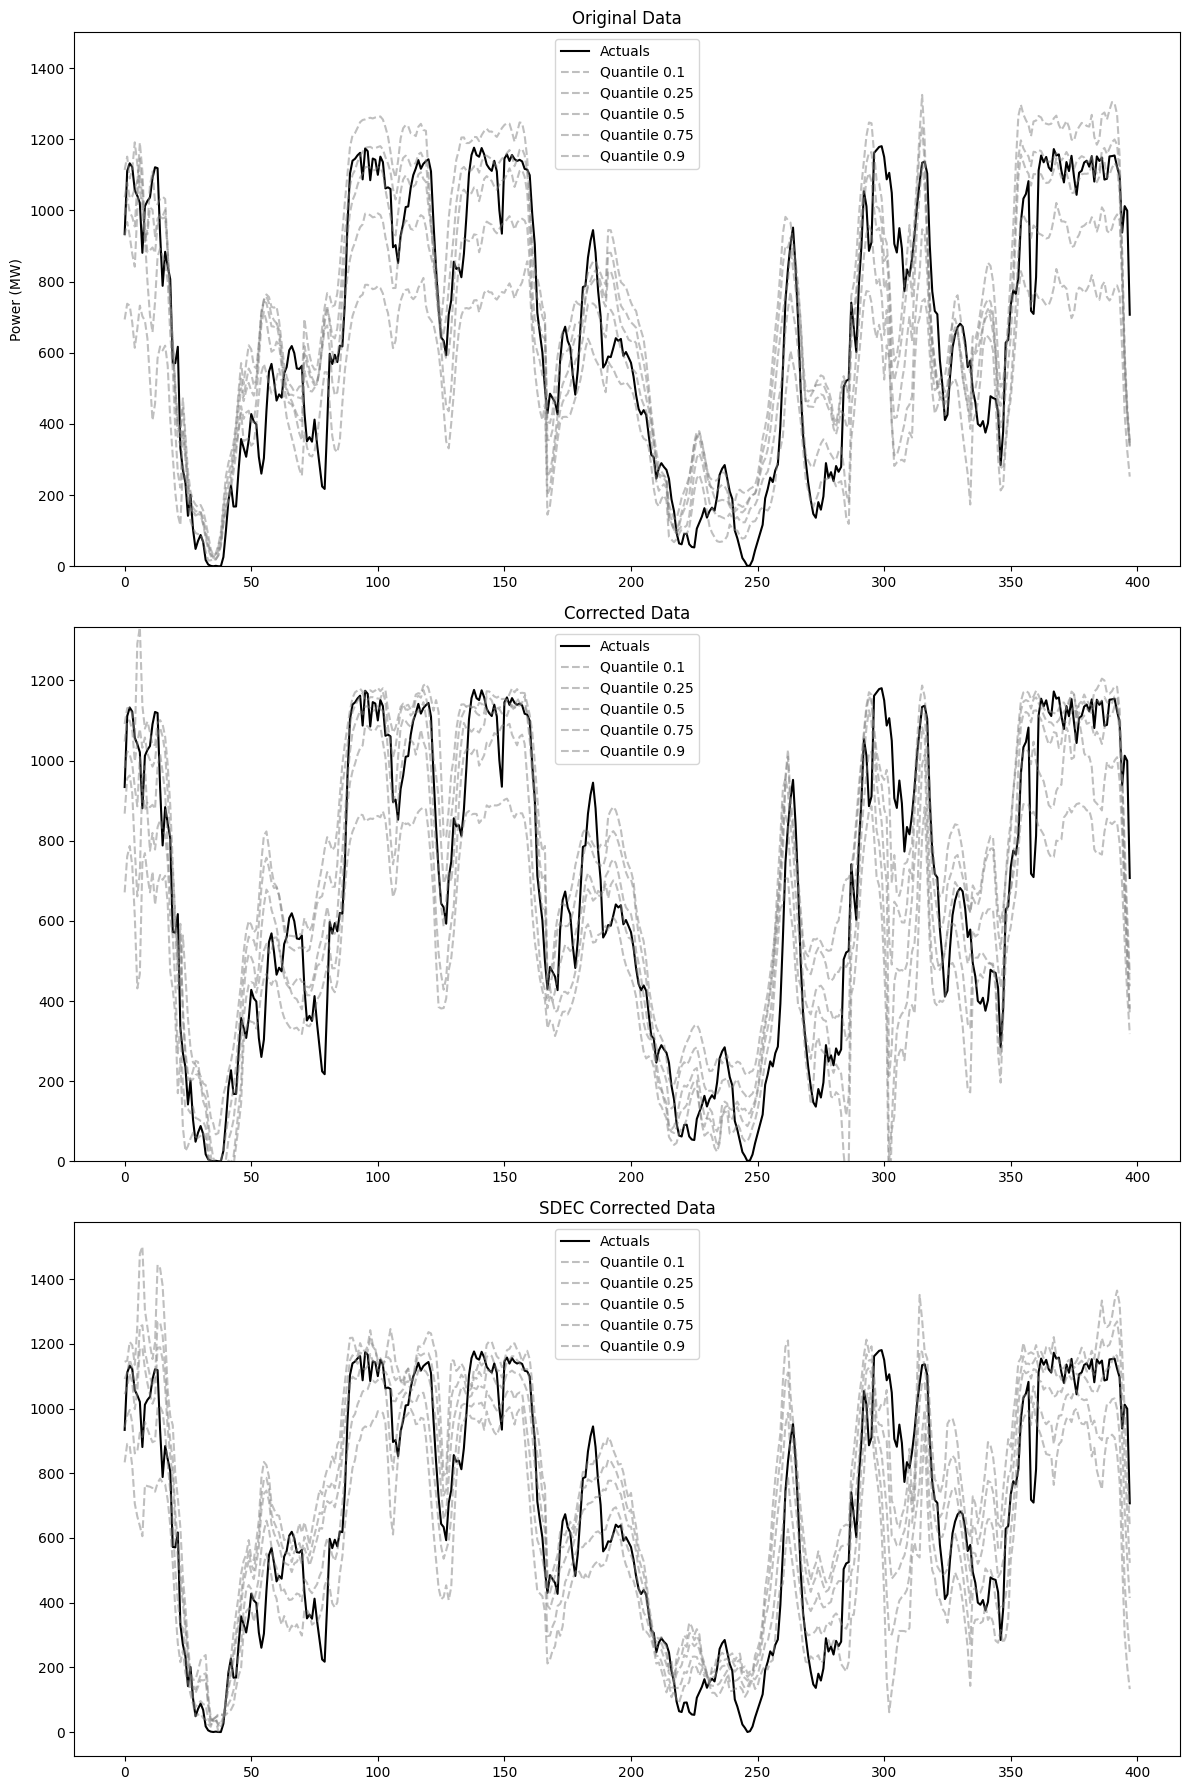

In [9]:
import matplotlib.pyplot as plt

# Define quantiles for plotting
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Create the 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# First subplot: y_actuals_ORIG and y_preds_ORIG
axs[0].plot(y_actuals_ORIG_len[0.5], label="Actuals", color="black")
for q in quantiles:
    axs[0].plot(y_preds_ORIG_len[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
axs[0].set_title("Original Data")
axs[0].legend()
axs[0].set_ylabel("Power (MW)")
axs[0].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_ORIG_len[0.9].max())])

# Second subplot: y_actuals_CORREC and y_preds_CORREC
axs[1].plot(y_actuals_CORREC_len[0.5], label="Actuals", color="black")
for q in quantiles:
    axs[1].plot(y_preds_CORREC_len[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
axs[1].set_title("Corrected Data")
axs[1].legend()
axs[1].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_CORREC_len[0.9].max())])
# Third subplot: y_actuals_SDECORRC and y_preds_SDECORRC
axs[2].plot(y_actuals_SDECORREC[0.5], label="Actuals", color="black")
for q in quantiles:
    axs[2].plot(y_preds_SDECORREC[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
axs[2].set_title("SDEC Corrected Data")
axs[2].legend()
axs[0].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_SDECORREC[0.9].max())])

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
# convert dict to list
y_preds_ORIG_list = [y_preds_ORIG_len[q] for q in quantiles]
y_preds_CORREC_list = [y_preds_CORREC_len[q] for q in quantiles]
y_preds_SDECORREC_list = [y_preds_SDECORREC[q] for q in quantiles]

[34.41270956 55.75325675 59.80439384 44.01588721 31.0647007 ] [29.88836715 49.10753818 55.75278167 41.32715651 24.70050177] [28.86512684 47.11223098 57.21125388 42.09634916 24.65157834]


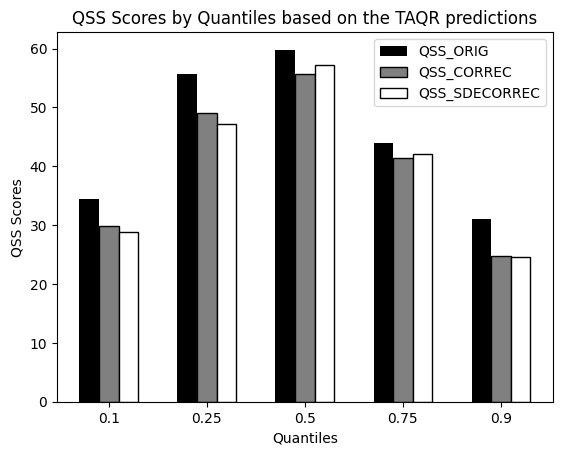

In [19]:
qss_ORIG = multi_quantile_skill_score(y_actuals_ORIG_len[0.5], y_preds_ORIG_list, quantiles=quantiles)
qss_CORREC = multi_quantile_skill_score(y_actuals_CORREC_len[0.5], y_preds_CORREC_list, quantiles=quantiles)
qss_SDECORREC = multi_quantile_skill_score(y_actuals_SDECORREC[0.5], y_preds_SDECORREC_list, quantiles=quantiles)
print(qss_ORIG, qss_CORREC, qss_SDECORREC)
# Plotting the bar chart
x = range(len(quantiles))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar([p - width for p in x], qss_ORIG, width, label='QSS_ORIG', color = "black")
bars2 = ax.bar(x, qss_CORREC, width, label='QSS_CORREC', color = "grey", edgecolor='black')
bars3 = ax.bar([p + width for p in x], qss_SDECORREC, width, label='QSS_SDECORREC', color = "white", edgecolor = "black")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Quantiles')
ax.set_ylabel('QSS Scores')
ax.set_title('QSS Scores by Quantiles based on the TAQR predictions')
ax.set_xticks(x)
ax.set_xticklabels(quantiles)
ax.legend()
plt.savefig("figures/QSS_scores_TAQR_predictions.pdf")
plt.show()

370.4988230400965 482.9801986436424 207.13496485675395


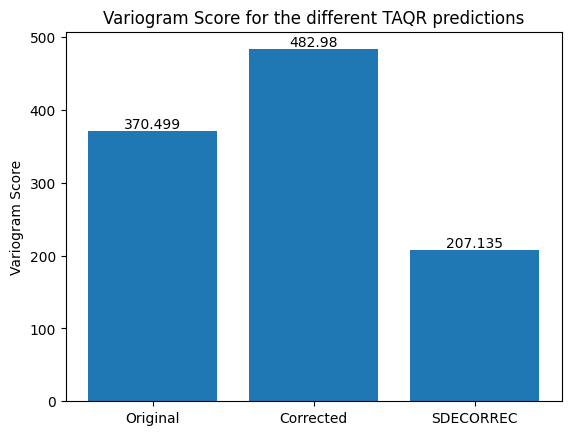

In [21]:
y_preds_SDECORREC_df = pd.DataFrame(y_preds_SDECORREC)
variogram_SDECORREC = variogram_score_R(y_preds_SDECORREC_df.values, y_actuals_SDECORREC[0.5], p=0.5)

y_preds_CORREC_df = pd.DataFrame(y_preds_CORREC)
variogram_CORREC = variogram_score_R(y_preds_CORREC_df.values, y_actuals_CORREC[0.5], p=0.5)

y_preds_ORIG_df = pd.DataFrame(y_preds_ORIG)
variogram_ORIG = variogram_score_R(y_preds_ORIG_df.values, y_actuals_ORIG[0.5], p=0.5)

print(variogram_ORIG, variogram_CORREC, variogram_SDECORREC)

# make a bar chart
fig, ax = plt.subplots()
bars = ax.bar(["Original", "Corrected", "SDECORREC"], [variogram_ORIG, variogram_CORREC, variogram_SDECORREC])
ax.set_ylabel('Variogram Score')
ax.set_title('Variogram Score for the different TAQR predictions')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

plt.show()


105.27499464890525 563.9842505425025 82.89838686677653


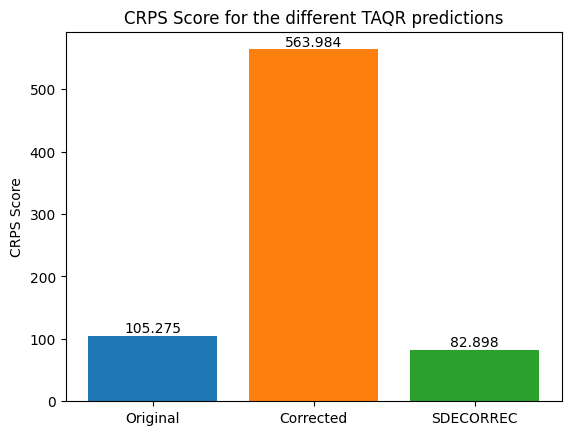

In [22]:
CRPS_ORIG = calculate_crps(y_actuals_ORIG[0.5], y_preds_ORIG_df.values)
CRPS_CORREC = calculate_crps(y_actuals_CORREC[0.5], y_preds_CORREC_df.values)
CRPS_SDECORREC = calculate_crps(y_actuals_SDECORREC[0.5], y_preds_SDECORREC_df.values)

print(CRPS_ORIG, CRPS_CORREC, CRPS_SDECORREC)

# Create a bar chart for the CRPS scores
fig, ax = plt.subplots()
bars = ax.bar(["Original", "Corrected", "SDECORREC"], [CRPS_ORIG, CRPS_CORREC, CRPS_SDECORREC], color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add labels, title, and values on top of bars
ax.set_ylabel('CRPS Score')
ax.set_title('CRPS Score for the different TAQR predictions')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

plt.show()

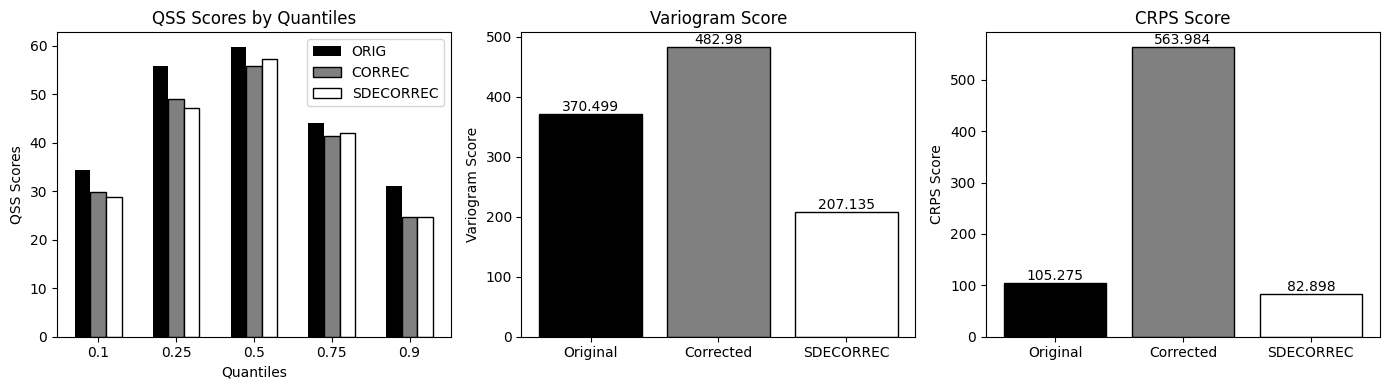

In [27]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming the previous calculations are already done and available as qss_ORIG, qss_CORREC, qss_SDECORREC, variogram_ORIG, variogram_CORREC, variogram_SDECORREC, CRPS_ORIG, CRPS_CORREC, CRPS_SDECORREC

# Data for plotting
x = range(len(quantiles))  # the label locations
width = 0.2  # the width of the bars

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

# Plot QSS Scores
bars1 = ax1.bar([p - width for p in x], qss_ORIG, width, label='ORIG', color = "black")
bars2 = ax1.bar(x, qss_CORREC, width, label='CORREC', color = "grey", edgecolor='black')
bars3 = ax1.bar([p + width for p in x], qss_SDECORREC, width, label='SDECORREC', color = "white", edgecolor = "black")
ax1.set_xlabel('Quantiles')
ax1.set_ylabel('QSS Scores')
ax1.set_title('QSS Scores by Quantiles')
ax1.set_xticks(x)
ax1.set_xticklabels(quantiles)
ax1.legend()

# Plot Variogram Scores
bars = ax2.bar(["Original", "Corrected", "SDECORREC"], [variogram_ORIG, variogram_CORREC, variogram_SDECORREC], color=['black', 'grey', 'white'], edgecolor='black')
ax2.set_ylabel('Variogram Score')
ax2.set_title('Variogram Score')
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Plot CRPS Scores
bars = ax3.bar(["Original", "Corrected", "SDECORREC"], [CRPS_ORIG, CRPS_CORREC, CRPS_SDECORREC], color=['black', 'grey', 'white'], edgecolor='black')
ax3.set_ylabel('CRPS Score')
ax3.set_title('CRPS Score')
for bar in bars:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig("figures/combined_scores_TAQR_predictions.pdf")
plt.show()


# Running stats on TAQR SDE + ORIG + CE

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_plots_and_scores(ensembles_orig, ensembles_corrected, ensembles_sde, actuals, quantiles=[0.1, 0.25, 0.5, 0.75, 0.9], plotname = "testplot", plot_option_1 = True, plot_option_2 = True):
    def run_predictions(ensembles, actuals, quantiles):
        actuals = actuals.loc[ensembles.index]
        return run_one_step_quantile_prediction(ensembles, actuals, quantiles)

    def select_last_n_elements(y_preds, y_actuals, n):
        return {k: v[-n:] for k, v in y_preds.items()}, {k: v[-n:] for k, v in y_actuals.items()}

    actuals_orig = actuals.loc[ensembles_orig.index]
    y_preds_ORIG, y_actuals_ORIG = run_predictions(ensembles_orig, actuals_orig, quantiles)

    actuals_corr = actuals.loc[ensembles_corrected.index]
    y_preds_CORREC, y_actuals_CORREC = run_predictions(ensembles_corrected, actuals_corr, quantiles)

    actuals_sde = actuals.loc[ensembles_sde.index]
    y_preds_SDECORREC, y_actuals_SDECORREC = run_predictions(ensembles_sde, actuals_sde, quantiles)

    y_preds_ORIG_len, y_actuals_ORIG_len = select_last_n_elements(y_preds_ORIG, y_actuals_ORIG, len(y_actuals_SDECORREC[0.5]))
    y_preds_CORREC_len, y_actuals_CORREC_len = select_last_n_elements(y_preds_CORREC, y_actuals_CORREC, len(y_actuals_SDECORREC[0.5]))

    # Plot Option 1
    if plot_option_1:
        fig, axs = plt.subplots(3, 1, figsize=(12, 18))

        axs[0].plot(y_actuals_ORIG_len[0.5], label="Actuals", color="black")
        for q in quantiles:
            axs[0].plot(y_preds_ORIG_len[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
        axs[0].set_title("Original Data")
        axs[0].legend()
        axs[0].set_ylabel("Power (MW)")
        axs[0].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_ORIG_len[0.9].max())])

        axs[1].plot(y_actuals_CORREC_len[0.5], label="Actuals", color="black")
        for q in quantiles:
            axs[1].plot(y_preds_CORREC_len[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
        axs[1].set_title("Corrected Data")
        axs[1].legend()
        axs[1].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_CORREC_len[0.9].max())])

        axs[2].plot(y_actuals_SDECORREC[0.5], label="Actuals", color="black")
        for q in quantiles:
            axs[2].plot(y_preds_SDECORREC[q], label=f"Quantile {q}", linestyle="--", color="grey", alpha=0.5)
        axs[2].set_title("SDE Corrected Data")
        axs[2].legend()
        axs[2].set_ylim([0, max(y_actuals_ORIG_len[0.5].max(), y_preds_SDECORREC[0.9].max())])
        plt.tight_layout()
        plt.savefig(f"figures/orig_ce_sde_TAQR_plot_{plotname}.pdf")
        plt.show()

    y_preds_ORIG_list = [y_preds_ORIG_len[q] for q in quantiles]
    y_preds_CORREC_list = [y_preds_CORREC_len[q] for q in quantiles]
    y_preds_SDECORREC_list = [y_preds_SDECORREC[q] for q in quantiles]

    qss_ORIG = multi_quantile_skill_score(y_actuals_ORIG_len[0.5], y_preds_ORIG_list, quantiles=quantiles)
    qss_CORREC = multi_quantile_skill_score(y_actuals_CORREC_len[0.5], y_preds_CORREC_list, quantiles=quantiles)
    qss_SDECORREC = multi_quantile_skill_score(y_actuals_SDECORREC[0.5], y_preds_SDECORREC_list, quantiles=quantiles)

    y_preds_SDECORREC_df = pd.DataFrame(y_preds_SDECORREC)
    variogram_SDECORREC = variogram_score_R(y_preds_SDECORREC_df.values, y_actuals_SDECORREC[0.5], p=0.5)

    y_preds_CORREC_df = pd.DataFrame(y_preds_CORREC)
    variogram_CORREC = variogram_score_R(y_preds_CORREC_df.values, y_actuals_CORREC[0.5], p=0.5)

    y_preds_ORIG_df = pd.DataFrame(y_preds_ORIG)
    variogram_ORIG = variogram_score_R(y_preds_ORIG_df.values, y_actuals_ORIG[0.5], p=0.5)

    CRPS_ORIG = calculate_crps(y_actuals_ORIG[0.5], y_preds_ORIG_df.values)
    CRPS_CORREC = calculate_crps(y_actuals_CORREC[0.5], y_preds_CORREC_df.values)
    CRPS_SDECORREC = calculate_crps(y_actuals_SDECORREC[0.5], y_preds_SDECORREC_df.values)

    # Plot Option 2
    if plot_option_2:
        x = range(len(quantiles))
        width = 0.2

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

        ax1.bar([p - width for p in x], qss_ORIG, width, label='ORIG', color="black")
        ax1.bar(x, qss_CORREC, width, label='CORREC', color="grey", edgecolor='black')
        ax1.bar([p + width for p in x], qss_SDECORREC, width, label='SDECORREC', color="white", edgecolor="black")
        ax1.set_xlabel('Quantiles')
        ax1.set_ylabel('QSS Scores')
        ax1.set_title('QSS Scores by Quantiles')
        ax1.set_xticks(x)
        ax1.set_xticklabels(quantiles)
        ax1.legend()

        bars = ax2.bar(["Original", "Corrected", "SDECORREC"], [variogram_ORIG, variogram_CORREC, variogram_SDECORREC], color=['black', 'grey', 'white'], edgecolor='black')
        ax2.set_ylabel('Variogram Score')
        ax2.set_title('Variogram Score')
        for bar in bars:
            yval = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

        bars = ax3.bar(["Original", "Corrected", "SDECORREC"], [CRPS_ORIG, CRPS_CORREC, CRPS_SDECORREC], color=['black', 'grey', 'white'], edgecolor='black')
        ax3.set_ylabel('CRPS Score')
        ax3.set_title('CRPS Score')
        for bar in bars:
            yval = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom')

        plt.tight_layout()
        plt.savefig(f"figures/orig_ce_sde_TAQR_stats_{plotname}.pdf")
        plt.show()

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  7 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 10 close to zeroes
p:  10
10 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 10 close to zeroes
p:  10
10 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 10 close to zeroes
p:  10
10 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 10 close to zeroes
p:  10
10 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 10 close to zeroes
p:  10
10 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


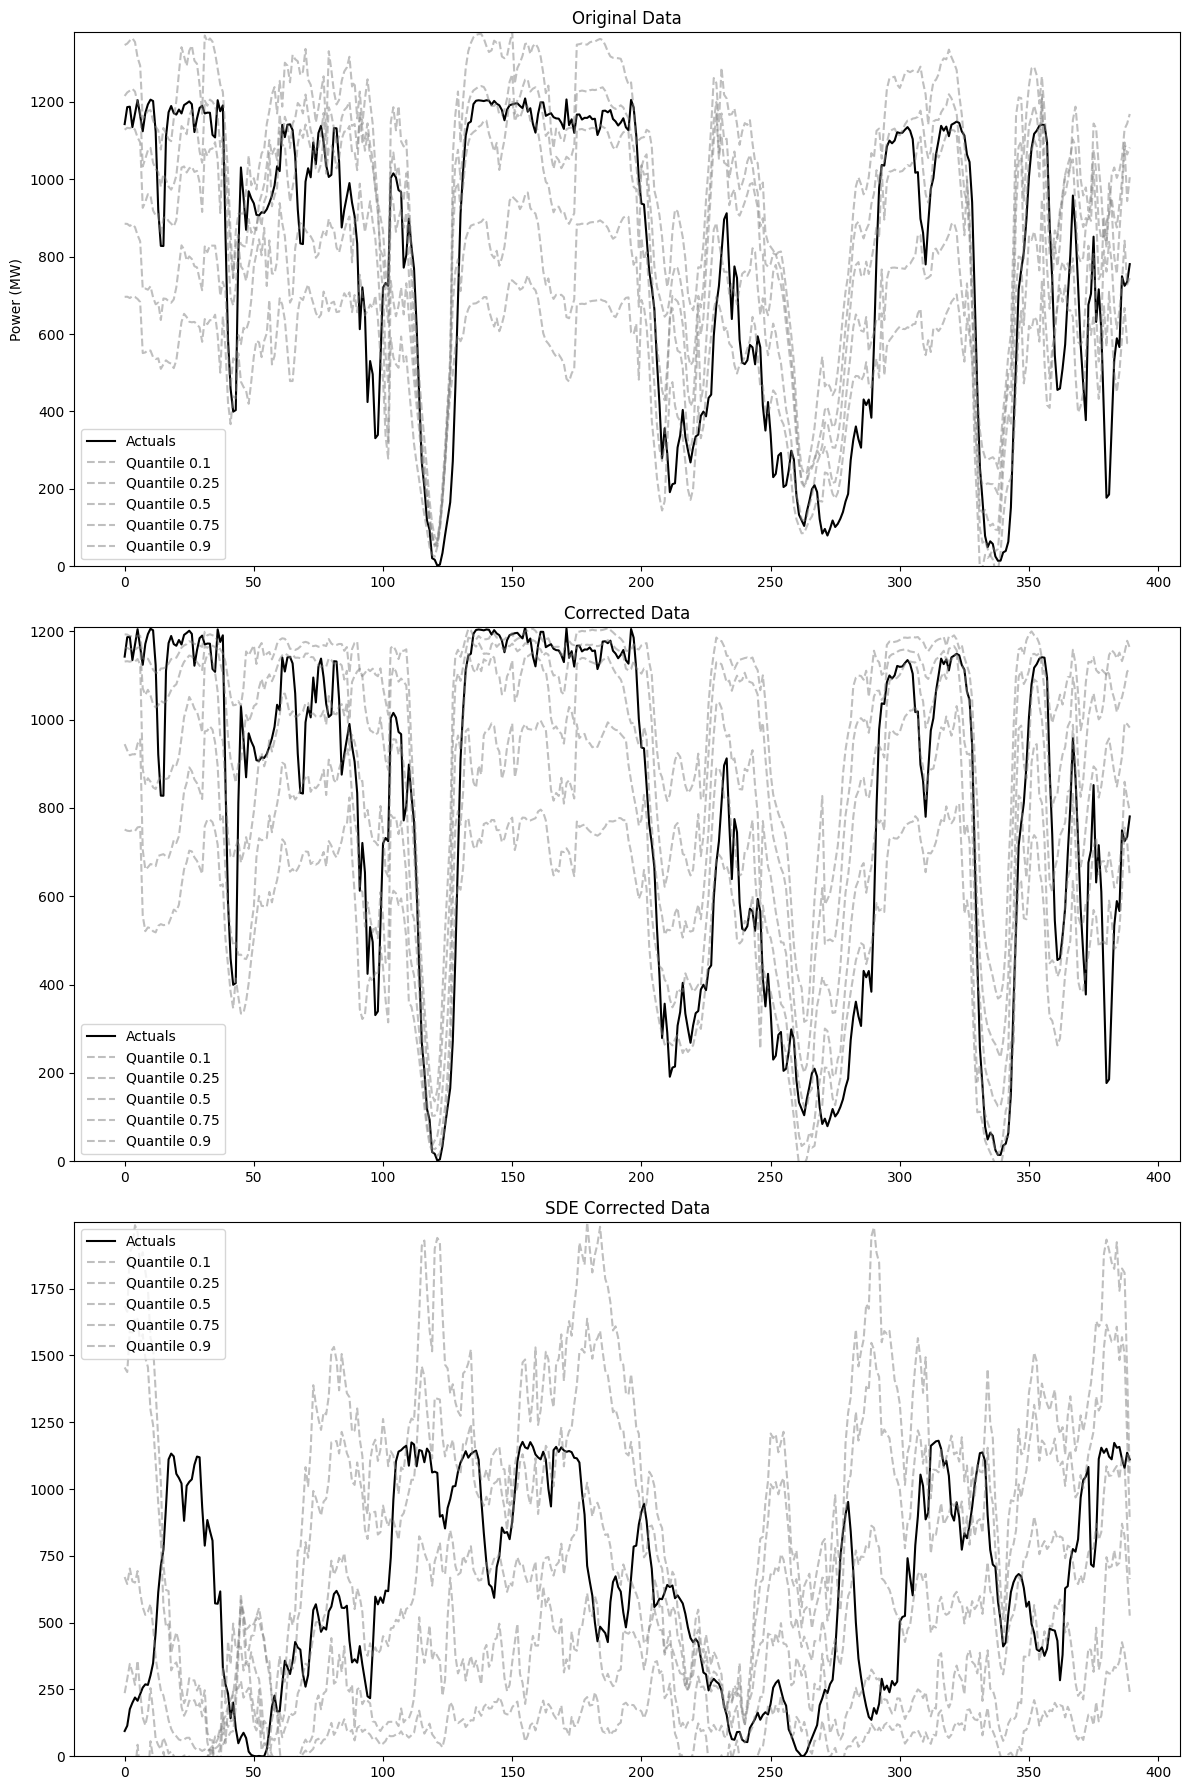

m,k:  390 5
m,k:  2604 5
m,k:  2604 5


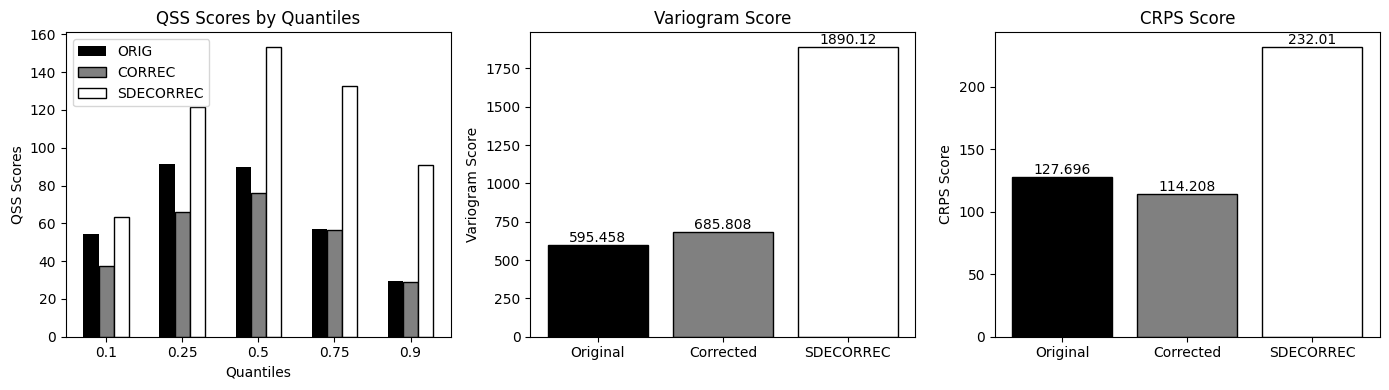

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Fejl i rq.fit.br(x, y, tau = tau, ...) : Singular design matrix
Kald: rq -> rq.fit -> rq.fit.br
Kørsel stoppet
Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  10
10 r_init zeros
Error for DK2_OffshoreWindPower_lstm: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 10)
There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Fejl i rq.fit.br(x, y, tau = tau, ...) : Singular design matrix
Kald: rq -> rq.fit -> rq.fit.br
Kørsel stoppet
Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  10
10 r_init zeros
Error for DK1_SolarPower_lstm: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 10)
There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  10
10 r_init zeros
Error for DK2_SolarPower_lstm: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 10)


Fejl i rq.fit.br(x, y, tau = tau, ...) : Singular design matrix
Kald: rq -> rq.fit -> rq.fit.br
Kørsel stoppet


In [12]:
sde_ensembles_DK1_OffshoreWindPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_OffshoreWindPower_lstm.pkl")
sde_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_OnshoreWindPower_FFNN.pkl")
sde_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_OffshoreWindPower_FFNN.pkl")
sde_ensembles_DK2_OffshoreWindPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_OffshoreWindPower_lstm.pkl") 

sde_ensembles_DK1_SolarPower_FFNN = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_SolarPower_FFNN.pkl")
sde_ensembles_DK2_SolarPower_FFNN = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_SolarPower_FFNN.pkl")
sde_ensembles_DK1_SolarPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_SolarPower_lstm.pkl")
sde_ensembles_DK2_SolarPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_SolarPower_lstm.pkl")


datasets = [
    (ensembles_DK1_offshorewindpower, Corrected_ensembles_DK1_OffshoreWindPower_lstm, Y_DK1_OffshoreWindPower, sde_ensembles_DK1_OffshoreWindPower_lstm, "DK1_OffshoreWindPower_lstm"),
    (ensembles_DK2_offshorewindpower, Corrected_ensembles_DK2_OffshoreWindPower_lstm, Y_DK2_OffshoreWindPower,sde_ensembles_DK2_OffshoreWindPower_lstm, "DK2_OffshoreWindPower_lstm"),
    # (ensembles_DK1_onshorewindpower, Corrected_ensembles_DK1_OnshoreWindPower_FFNN, Y_DK1_OnshoreWindPower,sde_ensembles_DK1_OnshoreWindPower_FFNN, "DK1_OnshoreWindPower_FFNN"),
    # (ensembles_DK2_offshorewindpower, Corrected_ensembles_DK2_OffshoreWindPower_FFNN, Y_DK2_OffshoreWindPower,sde_ensembles_DK2_OffshoreWindPower_FFNN, "DK2_OffshoreWindPower_FFNN"),
    # (ensembles_DK1_solarpower, Corrected_ensembles_DK1_SolarPower_FFNN, Y_DK1_SolarPower, sde_ensembles_DK1_SolarPower_FFNN, "DK1_SolarPower_FFNN"),
    # (ensembles_DK2_solarpower, Corrected_ensembles_DK2_SolarPower_FFNN, Y_DK2_SolarPower, sde_ensembles_DK2_SolarPower_FFNN,  "DK2_SolarPower_FFNN"),
    (ensembles_DK1_solarpower, Corrected_ensembles_DK1_SolarPower_lstm, Y_DK1_SolarPower, sde_ensembles_DK1_SolarPower_lstm,  "DK1_SolarPower_lstm"),
    (ensembles_DK2_solarpower, Corrected_ensembles_DK2_SolarPower_lstm, Y_DK2_SolarPower, sde_ensembles_DK2_SolarPower_lstm, "DK2_SolarPower_lstm")
]

for original_ensembles, corrected_ensembles, actuals, sde_corrected_ensembles, plotname in datasets:
    try:
        # fitting the data.
        original_ensembles = original_ensembles.loc[corrected_ensembles.index]
            # actuals = actuals.loc[corrected_ensembles.index]
        generate_plots_and_scores(original_ensembles, corrected_ensembles, sde_corrected_ensembles, actuals, quantiles=[0.1, 0.25, 0.5, 0.75, 0.9], plotname=plotname, plot_option_1=True, plot_option_2=True)
    except Exception as e:
        print(f"Error for {plotname}: {e}")
        

# Saving the SDE-CE

In [62]:
quantiles = [0.05, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 0.95]
corrected_ensembles = Corrected_ensembles_DK2_OffshoreWindPower_FFNN
actuals = Y_DK2_OffshoreWindPower.loc[corrected_ensembles.index]
name = "DK2_OffshoreWindPower_FFNN"

# do not show any warnings
import warnings
warnings.filterwarnings("ignore")

def save_sde_ensembles(quantiles, corrected_ensembles, actuals, name):

    actuals = actuals.loc[corrected_ensembles.index]

    latest_sde_ce, all_sde_ce = SDE_subprocess_ensembles_only(corrected_ensembles, actuals, quantiles, perc_train_sde=15, number_of_repeats=100)

    final_mean_quantile_estimate = {q: np.zeros(len(latest_sde_ce.T.iloc[0])) for q in quantiles}

    for key in all_sde_ce.keys():
        for q in quantiles:
            final_mean_quantile_estimate[q] += all_sde_ce[key][str(q)]

    final_mean_sde_quantile_estimate = {k: v/100 for k, v in final_mean_quantile_estimate.items()}
    # Now just truncate the max and min, to be max(actuals) and 0
    # So if any values are above or below, they should be set to their respective value
    for q in quantiles:
        final_mean_sde_quantile_estimate[q] = np.clip(final_mean_sde_quantile_estimate[q], 0, actuals.max())

    # save the final_mean_sde_quantile_estimate
    final_mean_sde_quantile_estimate_df = pd.DataFrame(final_mean_sde_quantile_estimate)
    final_mean_sde_quantile_estimate_df.to_pickle(f"sde_ensembles/mean_sde_quantile__{name}.pkl")

# save_sde_ensembles(quantiles, corrected_ensembles, actuals, name)

Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600
Trying initial guess 1...
600


## Doing it for all combinations

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# List of all corrected ensemble variables and their corresponding actuals and names
datasets = [
    (Corrected_ensembles_DK1_OffshoreWindPower_lstm, Y_DK1_OffshoreWindPower, "DK1_OffshoreWindPower_lstm"),
    (Corrected_ensembles_DK1_OnshoreWindPower_lstm, Y_DK1_OnshoreWindPower, "DK1_OnshoreWindPower_lstm"),
    (Corrected_ensembles_DK2_OffshoreWindPower_lstm, Y_DK2_OffshoreWindPower, "DK2_OffshoreWindPower_lstm"),
    (Corrected_ensembles_DK2_OnshoreWindPower_lstm, Y_DK2_OnshoreWindPower, "DK2_OnshoreWindPower_lstm"),
    (Corrected_ensembles_DK1_OffshoreWindPower_FFNN, Y_DK1_OffshoreWindPower, "DK1_OffshoreWindPower_FFNN"),
    (Corrected_ensembles_DK1_OnshoreWindPower_FFNN, Y_DK1_OnshoreWindPower, "DK1_OnshoreWindPower_FFNN"),
    (Corrected_ensembles_DK2_OffshoreWindPower_FFNN, Y_DK2_OffshoreWindPower, "DK2_OffshoreWindPower_FFNN"),
    (Corrected_ensembles_DK2_OnshoreWindPower_FFNN, Y_DK2_OnshoreWindPower, "DK2_OnshoreWindPower_FFNN"),
    (Corrected_ensembles_DK1_SolarPower_FFNN, Y_DK1_SolarPower, "DK1_SolarPower_FFNN"),
    (Corrected_ensembles_DK2_SolarPower_FFNN, Y_DK2_SolarPower, "DK2_SolarPower_FFNN"),
    (Corrected_ensembles_DK1_SolarPower_lstm, Y_DK1_SolarPower, "DK1_SolarPower_lstm"),
    (Corrected_ensembles_DK2_SolarPower_lstm, Y_DK2_SolarPower, "DK2_SolarPower_lstm")
]

# Process each corrected ensemble
for corrected_ensembles, actuals, name in datasets:
    print(f"Processing {name}...")
    print("length of ensembles", len(corrected_ensembles))
    print("length of actuals", len(actuals))
    try:
        save_sde_ensembles(quantiles, corrected_ensembles, actuals, name)
    except:
        print(f"Error processing {name}.")
        continue

print("Processing completed for all corrected ensembles.")

NameError: name 'Corrected_ensembles_DK1_OffshoreWindPower_lstm' is not defined

## Getting the parameters for the OU process


In [13]:
# Getting the OU parameters
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

datasets = [
    (Corrected_ensembles_DK1_OffshoreWindPower_lstm, Y_DK1_OffshoreWindPower, "DK1_OffshoreWindPower_lstm"),
    (Corrected_ensembles_DK1_OnshoreWindPower_lstm, Y_DK1_OnshoreWindPower, "DK1_OnshoreWindPower_lstm"),
    (Corrected_ensembles_DK2_OffshoreWindPower_lstm, Y_DK2_OffshoreWindPower, "DK2_OffshoreWindPower_lstm"),
    (Corrected_ensembles_DK2_OnshoreWindPower_lstm, Y_DK2_OnshoreWindPower, "DK2_OnshoreWindPower_lstm"),
    (Corrected_ensembles_DK1_OffshoreWindPower_FFNN, Y_DK1_OffshoreWindPower, "DK1_OffshoreWindPower_FFNN"),
    (Corrected_ensembles_DK1_OnshoreWindPower_FFNN, Y_DK1_OnshoreWindPower, "DK1_OnshoreWindPower_FFNN"),
    (Corrected_ensembles_DK2_OffshoreWindPower_FFNN, Y_DK2_OffshoreWindPower, "DK2_OffshoreWindPower_FFNN"),
    (Corrected_ensembles_DK2_OnshoreWindPower_FFNN, Y_DK2_OnshoreWindPower, "DK2_OnshoreWindPower_FFNN"),
    (Corrected_ensembles_DK1_SolarPower_FFNN, Y_DK1_SolarPower, "DK1_SolarPower_FFNN"),
    (Corrected_ensembles_DK2_SolarPower_FFNN, Y_DK2_SolarPower, "DK2_SolarPower_FFNN"),
    (Corrected_ensembles_DK1_SolarPower_lstm, Y_DK1_SolarPower, "DK1_SolarPower_lstm"),
    (Corrected_ensembles_DK2_SolarPower_lstm, Y_DK2_SolarPower, "DK2_SolarPower_lstm")
]
params_dict = {}    
for corrected_ensembles, actuals, name in datasets:
    actuals = actuals.loc[corrected_ensembles.index]
    try:
        params_dict[name] = SDE_subprocess_parameters_only(corrected_ensembles, actuals, quantiles, perc_train_sde=15, number_of_repeats=100)
    except Exception as e:
        print(f"Error processing {name}.")
        print(e)
        continue

pd.DataFrame(params_dict).to_latex("latex_output/params_dict.tex")

Trying initial guess 1...
Trying initial guess 2...
Trying initial guess 3...
Trying initial guess 4...
Trying initial guess 5...
592
Trying initial guess 1...
592
Trying initial guess 1...
592
Trying initial guess 1...
592
Trying initial guess 1...
592
The estimated parameters are:  {0.1: array([7.93114063e-03, 1.03282234e+02]), 0.25: array([2.84627176e-02, 1.08193508e+02]), 0.5: array([3.76397469e-02, 1.10857464e+02]), 0.75: array([3.84305273e-02, 1.09949764e+02]), 0.9: array([3.84343644e-02, 1.08897377e+02])}
Trying initial guess 1...
Trying initial guess 2...
592
Trying initial guess 1...
592
Trying initial guess 1...
592
Trying initial guess 1...
592
Trying initial guess 1...
Trying initial guess 2...
592
The estimated parameters are:  {0.1: array([1.66790041e-02, 1.89396111e+02]), 0.25: array([1.72040791e-02, 1.89558774e+02]), 0.5: array([1.74724234e-02, 1.89790047e+02]), 0.75: array([1.72860189e-02, 1.92399666e+02]), 0.9: array([1.69760725e-02, 1.94019817e+02])}
Trying initial g

In [15]:
pd.DataFrame(params_dict).T.round(2)

,0.10,0.25,0.50,0.75,0.90
DK1_OffshoreWindPower_lstm,"[0.00793114063108747, 103.28223365458595]","[0.028462717610949078, 108.19350841914734]","[0.03763974692697599, 110.85746382550673]","[0.03843052725772046, 109.9497644773287]","[0.03843436435608982, 108.89737678227831]"
DK1_OnshoreWindPower_lstm,"[0.016679004054634, 189.39611075991124]","[0.01720407906330718, 189.55877444224672]","[0.017472423393357753, 189.79004747189822]","[0.017286018894764957, 192.39966575963987]","[0.016976072504393543, 194.01981721156346]"
DK2_OffshoreWindPower_lstm,"[0.005136669112341775, 69.72259106108754]","[0.012937163545009766, 84.3859501251923]","[0.027687785495273506, 99.06243104724388]","[0.030357420637451765, 101.89562263433562]","[0.0295084291964893, 101.23791994833849]"
DK1_OnshoreWindPower_FFNN,"[0.050068324620911014, 117.5494911571627]","[0.09018718426513248, 114.49507888267446]","[0.09604938206284477, 114.7535883042224]","[0.05065315450440703, 120.99852207348916]","[0.02847674299497142, 134.2642426050888]"
DK2_OffshoreWindPower_FFNN,"[0.03827913786405418, 111.66691367663145]","[0.034950019087155955, 88.16070428028407]","[0.04692582912835295, 83.86212179727102]","[0.060087944698952636, 88.52267336233768]","[0.0628184780614557, 101.67466113968517]"
DK1_SolarPower_FFNN,"[0.1051568441180752, 192.3462839709029]","[0.11394380874505526, 197.63190471094714]","[0.12388710328797711, 205.11578390170862]","[0.1330364335282471, 214.34960152764697]","[0.1397963305773241, 225.4114356268496]"
DK2_SolarPower_FFNN,"[0.146798932703276, 54.416812193779386]","[0.17264292241426266, 52.79918979345323]","[0.20217424522699862, 51.77890494347309]","[0.21174504962137194, 51.546908596147745]","[0.20253741941803594, 52.04838261971711]"
DK1_SolarPower_lstm,"[0.045204374444161505, 163.5699701381711]","[0.08268434530746069, 177.18709906399684]","[0.12010520014375162, 201.4579361150366]","[0.13209807856988245, 213.67106946450565]","[0.1392817185883244, 223.2265864807654]"
DK2_SolarPower_lstm,"[0.10779200556053617, 56.3090769816199]","[0.16460981879481937, 52.532530205684]","[0.19329655314204452, 51.465087362634485]","[0.21450221850575166, 51.671106243666515]","[0.2116159014330273, 52.76349701574871]"


In [27]:
import pandas as pd

# Assuming df is your dataframe
df = pd.DataFrame(params_dict).T

# Function to round each element in a list
round_list = lambda lst: [round(x, 2) for x in lst]

# Apply the function to each element in the dataframe
df_rounded = df.applymap(round_list)

df_rounded.to_latex("latex_output/params_dict_rounded.tex")